## Introduction

Bigmart is a big supermarket chain, with stores all around the country. The management of the shop had set out a challenge to all Data Scientist to help them create a model that can predict the sales per product for each store.

The shop has collected sales data of products across 10 stores in different cities over a given period of time.

## Breakdown of the Problem Statement

This is a supervised machine learning problem with a target label as : (Item_Outlet_Sales)

Also since we are expected to predict the sale price for a given product, it becomes a regression task.

## SCRIPT

#### imports

In [1]:
from pyforest import *
lazy_imports()

['from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.preprocessing import RobustScaler',
 'from pyspark import SparkContext',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import bokeh',
 'import gensim',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import plotly as py',
 'from sklearn.ensemble import RandomForestClassifier',
 'import textblob',
 'from sklearn.preprocessing import MinMaxScaler',
 'import re',
 'from sklearn.impute import SimpleImputer',
 'import sklearn',
 'import skimage',
 'import glob',
 'from scipy import stats',
 'import fastai',
 'from sklearn.model_selection import train_test_split',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn.linear_model import ElasticNet',
 'from sklearn.preprocessing import LabelEncoder',
 'import dash',
 'import pydot',
 'from sklearn.model_selection import RandomizedSearchCV',
 'from sklearn import svm',
 'import matplotlib.pyplot as plt',
 'from openpyxl import load

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Dataset reading

In [3]:
# training data frame .Will be used to train the model. We dont need to split it to test and train.
# PS : contain target variable

df_train = pd.read_csv('dataset/train.csv',header = 0)
df_train.head()

<IPython.core.display.Javascript object>

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Test dataframe . Will be used for testing and evaluation.
# PS: doesnot contain target variable

df_test = pd.read_csv('dataset/test.csv',header = 0)
df_test.head()

<IPython.core.display.Javascript object>

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
# brief idea about train and test

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Data train and test are not cleaned as it contain a lot of null values 

In [7]:
#### null check

df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
#### null check

df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Items_weight and outlet_size has null values.

##### combining test and train

As we need to treat null values and analysis, We will combine train and test together and follow operations. For training we will use df_train only

In [9]:
df_train['Source'] = 'train'
df_test['Source'] = 'test'

df_eda = pd.concat([df_train,df_test],ignore_index = True)
df_eda.head()

<IPython.core.display.Javascript object>

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


##### conbined data null check

In [10]:
df_eda.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

Items_weight and outlet_size has null values. The other null values from outlet sales are because test data doesnot contain target variable.We can ignore that

#### EDA (on training data)

##### describe

In [11]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


##### box plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

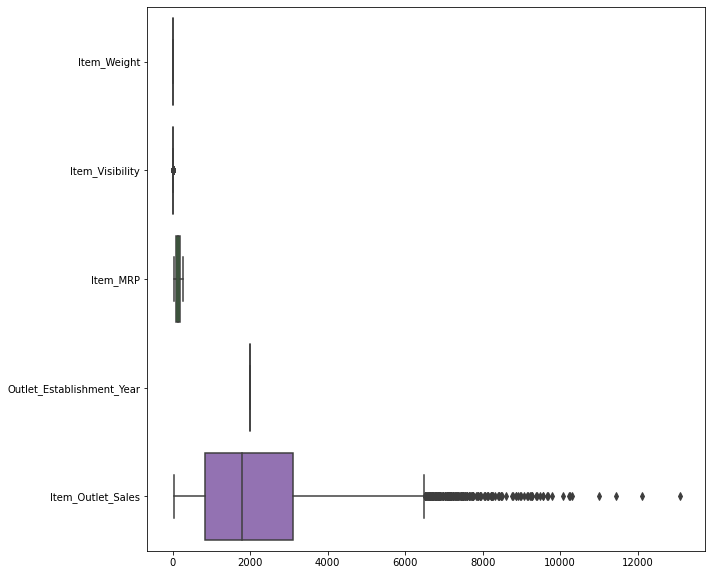

In [12]:
plt.figure(figsize = (10,10))
sns.boxplot(data = df_train, orient = "h")

##### density plot of target variable 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

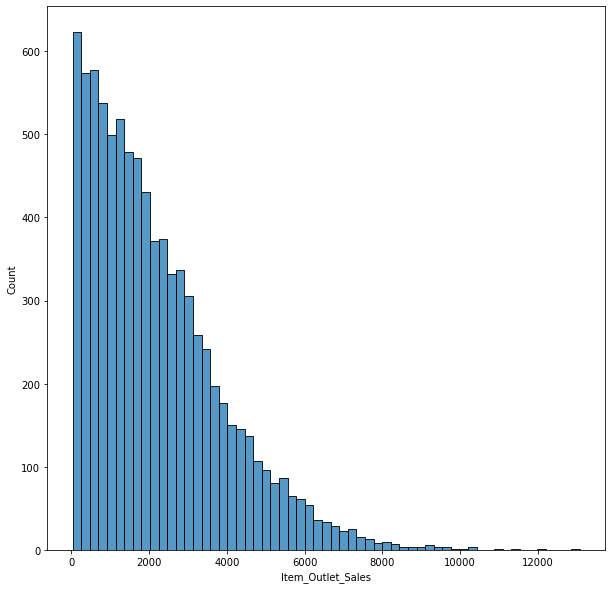

In [13]:
plt.figure(figsize = (10,10))
sns.histplot(df_train['Item_Outlet_Sales'])

##### density plot for all numerical variable from train data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

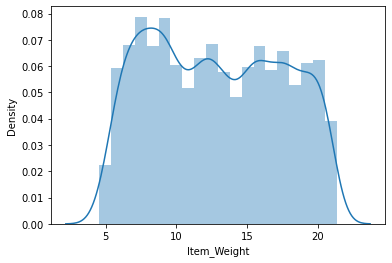

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

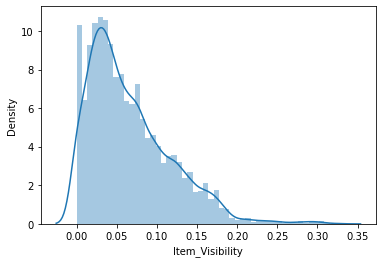

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

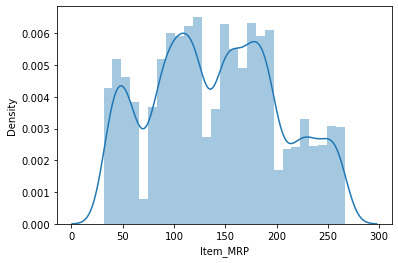

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

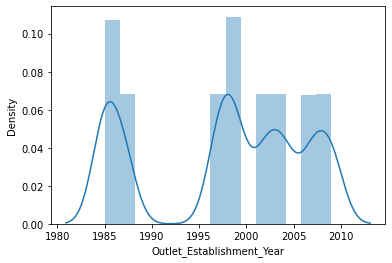

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

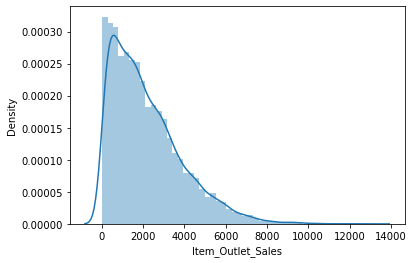

In [14]:
for i in df_train.describe().columns:
    sns.distplot(df_train[i].dropna())
    plt.show()

##### box plot for all numerical variable from train data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

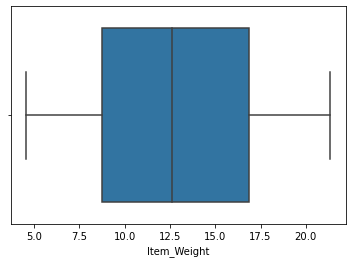

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

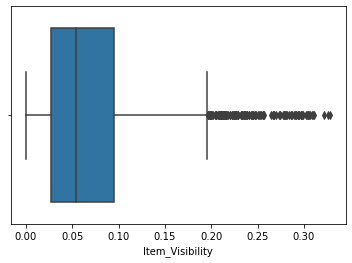

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

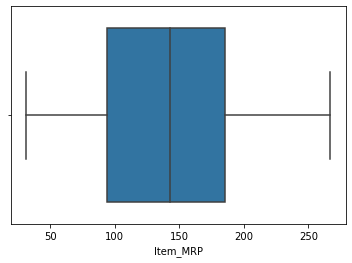

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

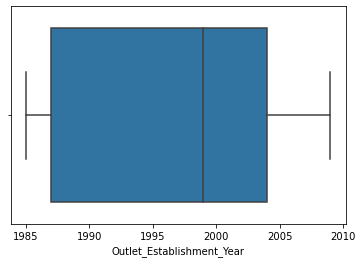

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

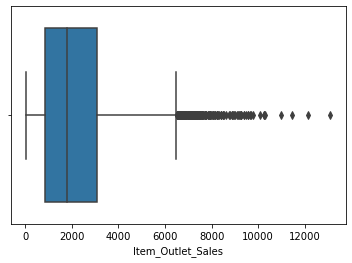

In [15]:
for i in df_train.describe().columns:
    sns.boxplot(df_train[i].dropna())
    plt.show()

##### count plot 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

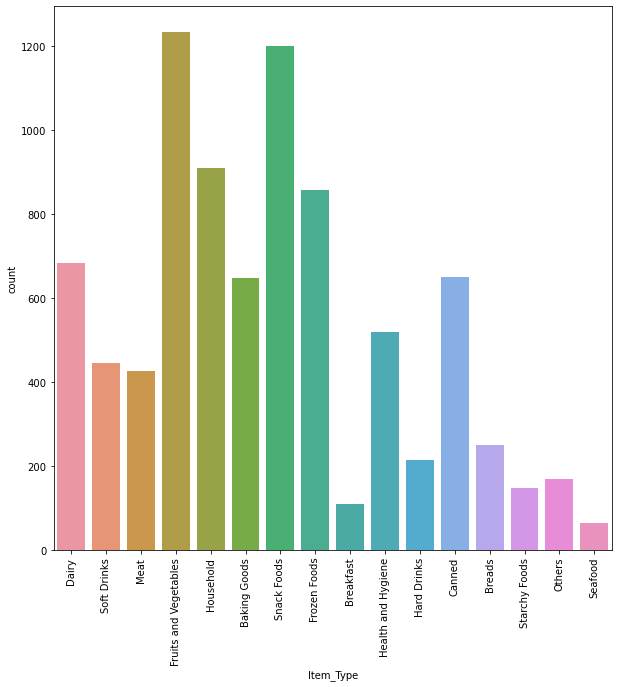

In [16]:
# item type

plt.figure(figsize = (10,10))
sns.countplot(df_train.Item_Type)
plt.xticks(rotation = 90)

In [17]:
df_train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<IPython.core.display.Javascript object>

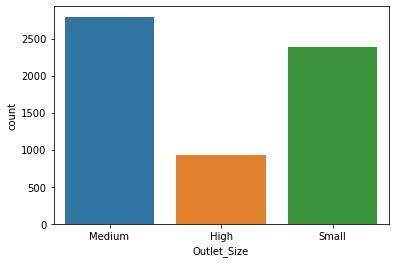

In [18]:
# outlet size

sns.countplot(df_train.Outlet_Size)

In [19]:
df_train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<IPython.core.display.Javascript object>

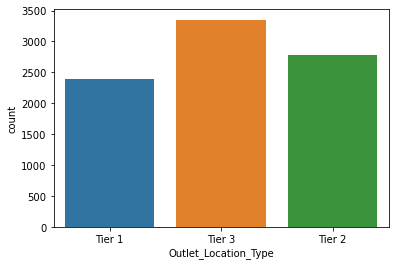

In [20]:
# oulet location

sns.countplot(df_train.Outlet_Location_Type)

In [21]:
df_train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

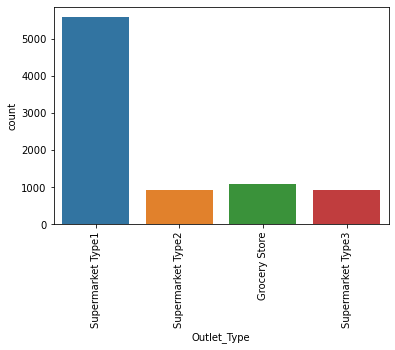

In [22]:
# outlet type

sns.countplot(df_train.Outlet_Type)
plt.xticks(rotation = 90)
plt.show()

In [23]:
df_train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

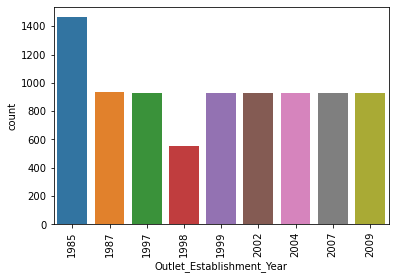

In [24]:
# outlet establishment year

sns.countplot(df_train.Outlet_Establishment_Year)
plt.xticks(rotation = 90)
plt.show()

In [25]:
df_train.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

##### correlation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

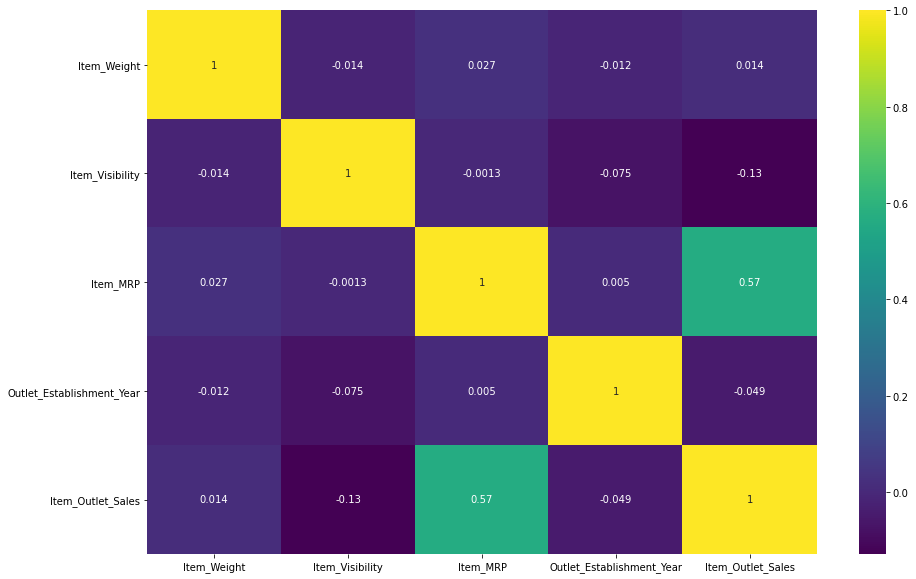

In [26]:
plt.figure(figsize = (15,10))
sns.heatmap(df_train.corr(),annot = True, cmap = 'viridis')

Here item_mrp has 60% (approx) relation with sales

##### Scatter plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

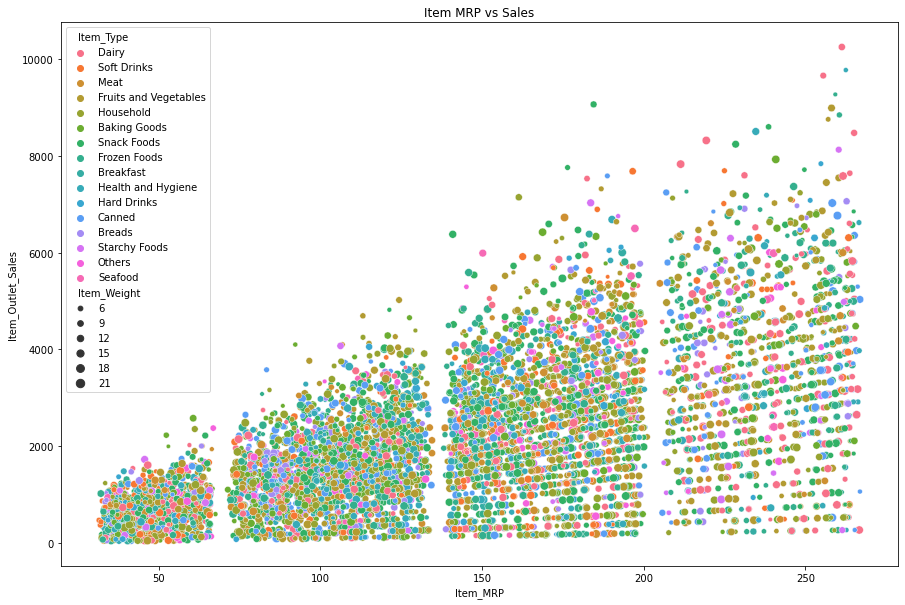

In [27]:
# mrp vs sales

plt.figure(figsize = (15,10))
plt.title('Item MRP vs Sales')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
#plt.xticks(rotation = 90)
sns.scatterplot(data = df_train, x = 'Item_MRP',y = 'Item_Outlet_Sales',hue = 'Item_Type',size = 'Item_Weight')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

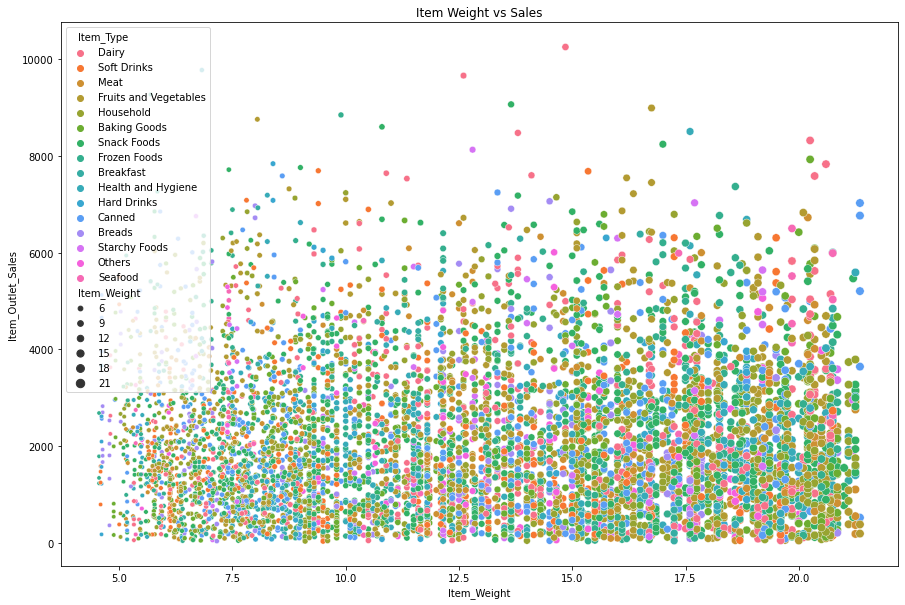

In [28]:
# item weight vs sales

plt.figure(figsize = (15,10))
plt.title('Item Weight vs Sales')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
#plt.xticks(rotation = 90)
sns.scatterplot(data = df_train, x = 'Item_Weight',y = 'Item_Outlet_Sales',hue = 'Item_Type',size = 'Item_Weight')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

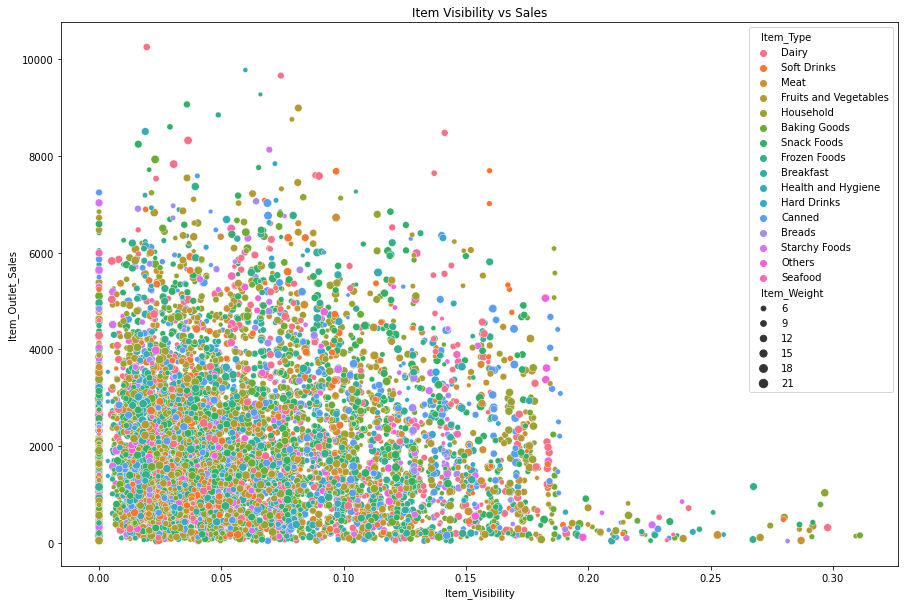

In [29]:
# item visibility vs sales

plt.figure(figsize = (15,10))
plt.title('Item Visibility vs Sales')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
#plt.xticks(rotation = 90)
sns.scatterplot(data = df_train, x = 'Item_Visibility',y = 'Item_Outlet_Sales',hue = 'Item_Type',size = 'Item_Weight')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

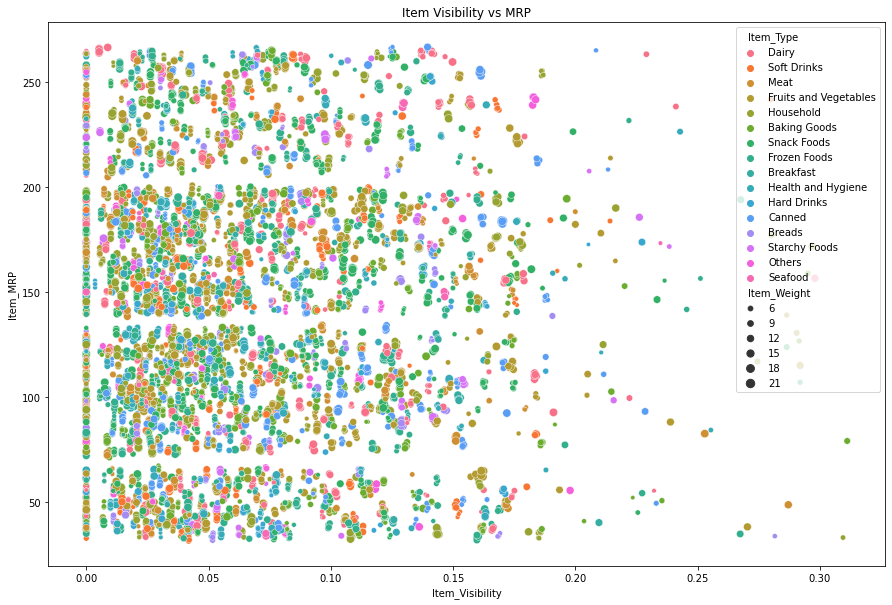

In [30]:
# item visibility vs mrp

plt.figure(figsize = (15,10))
plt.title('Item Visibility vs MRP')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_MRP')
#plt.xticks(rotation = 90)
sns.scatterplot(data = df_train, x = 'Item_Visibility',y = 'Item_MRP',hue = 'Item_Type',size = 'Item_Weight')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

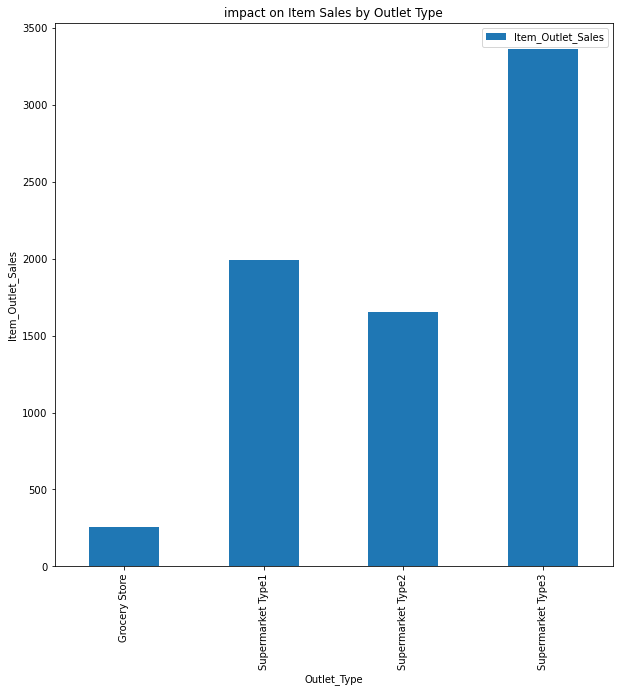

In [31]:
# impact of outlet type on sales

pivot_outlet_type = df_train.pivot_table(index = 'Outlet_Type',values = 'Item_Outlet_Sales', aggfunc = np.median)

pivot_outlet_type.plot(kind = 'bar',figsize = (10,10))
plt.title('impact on Item Sales by Outlet Type')
plt.ylabel('Item_Outlet_Sales')
plt.xlabel('Outlet_Type')
#plt.xticks(rotation = 90)
plt.show()

In [32]:
# impact of item fat content on sales

df_eda.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [33]:
# low fat , LF to Low Fat and reg to Regular

df_eda.Item_Fat_Content.replace({'LF':'Low Fat','reg' : 'Regular', 'low fat' : 'Low Fat'},inplace = True)
df_eda.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

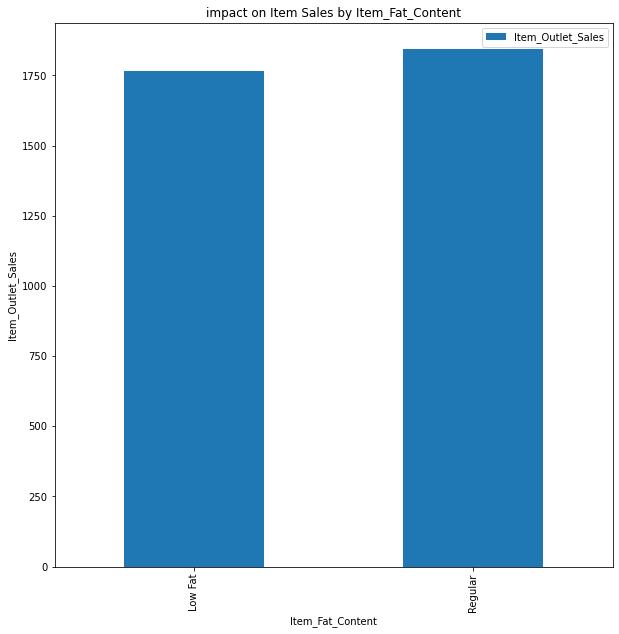

In [34]:
# impact of item fat on sales

pivot_outlet_type = df_eda.pivot_table(index = 'Item_Fat_Content',values = 'Item_Outlet_Sales', aggfunc = np.median)

pivot_outlet_type.plot(kind = 'bar',figsize = (10,10))
plt.title('impact on Item Sales by Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.xlabel('Item_Fat_Content')
#plt.xticks(rotation = 90)
plt.show()

#### Feature Engineering and Transformation

##### Treating Missing Values

We have two columns with null value:
    1. Item Weight
    2. Outlet Size

Now as the Item Weight is normally distributed (from box plot), so it is ideal to replace the nan values with mean

In [35]:
# Item Weight

df_eda['Item_Weight'].fillna(df_eda['Item_Weight'].mean(),inplace = True)
df_eda['Item_Weight'].isnull().sum()

0

In [36]:
# Outlet Size

df_eda['Outlet_Size'].fillna('Medium',inplace = True)
df_eda['Outlet_Size'].isnull().sum()

0

As the outlet size as three category and the medium has more data points so its better to replace the nan values with mode

In [37]:
df_eda['Outlet_Size'].value_counts()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [38]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [39]:
# Item visibility

Here Item visibility = 0 means the item is not visible or not there in the store. but the item with 0 visibility is sold which contradict the point. So we consider 0 as Null.We wanted to replace 0 with median as the Item visibilty follow a left skewed plot, hence mean is not a good replace but median can be considered. 

In [40]:
df_eda[df_eda['Item_Visibility'] == 0]['Item_Visibility'].value_counts()

0.0    879
Name: Item_Visibility, dtype: int64

In [41]:
df_eda['Item_Visibility'].replace({0 : df_eda['Item_Visibility'].median()},inplace = True)

In [42]:
df_eda[df_eda['Item_Visibility'] == 0]['Item_Visibility'].value_counts()

Series([], Name: Item_Visibility, dtype: int64)

In [43]:
min(df_eda.Item_Visibility)

0.003574698

In [44]:
# Outlet Years Creation

df_eda['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
2004    1550
1997    1550
1999    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [45]:
max(df_eda['Outlet_Establishment_Year'])

2009

In [46]:
df_eda['Outlet_Years'] = max(df_eda['Outlet_Establishment_Year']) - df_eda['Outlet_Establishment_Year']
df_eda['Outlet_Years']

0        10
1         0
2        10
3        11
4        22
         ..
14199    12
14200     0
14201     7
14202     2
14203     7
Name: Outlet_Years, Length: 14204, dtype: int64

In [47]:
df_eda['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

In [48]:
# items

df_eda['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Here there are 16 categories !

In [49]:
# item identifier

df_eda['Item_Identifier'].value_counts()

FDC20    10
FDJ53    10
FDT25    10
FDY58    10
FDA13    10
         ..
FDI46     7
FDL50     7
FDS22     7
FDH58     7
FDO33     7
Name: Item_Identifier, Length: 1559, dtype: int64

Here the first two letters illustrate the general category of the items :\
    1.FD = Food\
    2.NC = Non Consumable\
    3.DR = Drink
    
So its easier to categories these items into 3 categories rather than 16 types as described above.

In [50]:
df_eda['New_Item_Type'] = df_eda['Item_Identifier'].apply(lambda x: x[0:2])
df_eda['New_Item_Type'] = df_eda['New_Item_Type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drink'})
df_eda['New_Item_Type'].value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: New_Item_Type, dtype: int64

##### Non-consumable should not have fat content

In [51]:
# changing fat content of non consumable to non edible

df_eda.loc[df_eda['New_Item_Type'] == 'Non-Consumable','Item_Fat_Content'] = 'Non Edible'
df_eda['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non Edible    2686
Name: Item_Fat_Content, dtype: int64

##### Item Visibility weight creation

Under normal situation, the product that is more visible ,its likely to have higher sales.We can based on these hypothesis and create importance given to a product in a given store according to the mean of significance given to the same product in all other store. 

In [52]:
item_vis_avg = df_eda.pivot_table(index = 'Item_Identifier',values = 'Item_Visibility')
item_vis_avg

,Item_Visibility
Item_Identifier,
DRA12,0.046942
DRA24,0.045646
DRA59,0.138786
DRB01,0.086489
DRB13,0.012801
...,...
NCZ30,0.032704
NCZ41,0.063148
NCZ42,0.016417


In [53]:
imp_fun = lambda x : x['Item_Visibility']/item_vis_avg['Item_Visibility'][item_vis_avg.index == x['Item_Identifier']][0]
df_eda['Item_Vis_Avg'] = df_eda.apply(imp_fun,axis = 1).astype(float)
df_eda.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet_Years,New_Item_Type,Item_Vis_Avg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,10,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0,Drink,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,10,Food,0.733187
3,FDX07,19.20,Regular,0.054021,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,11,Food,1.810406
4,NCD19,8.93,Non Edible,0.054021,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,22,Non-Consumable,1.944117


#### label Encoder

##### categories to label encoder 

In [54]:
label = LabelEncoder()

variables = ['Item_Fat_Content','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']
for i in variables:
    df_eda[i] = label.fit_transform(df_eda[i])
    
df_eda.head()

<IPython.core.display.Javascript object>

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet_Years,New_Item_Type,Item_Vis_Avg
0,FDA15,9.30,0,0.016047,Dairy,249.8092,9,1999,1,0,1,3735.1380,train,10,1,0.931078
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,3,2009,1,2,2,443.4228,train,0,0,0.933420
2,FDN15,17.50,0,0.016760,Meat,141.6180,9,1999,1,0,1,2097.2700,train,10,1,0.733187
3,FDX07,19.20,2,0.054021,Fruits and Vegetables,182.0950,0,1998,1,2,0,732.3800,train,11,1,1.810406
4,NCD19,8.93,1,0.054021,Household,53.8614,1,1987,0,2,1,994.7052,train,22,2,1.944117


Creating dummies to avoid higher importance to higher labels( The whole label encoder and dummies can be replaced by one hot encoder which dpes the same thing)

In [55]:
df_eda = pd.get_dummies(df_eda,columns = variables)
df_eda.info()

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Visibility            14204 non-null  float64
 3   Item_Type                  14204 non-null  object 
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Establishment_Year  14204 non-null  int64  
 6   Item_Outlet_Sales          8523 non-null   float64
 7   Source                     14204 non-null  object 
 8   Outlet_Years               14204 non-null  int64  
 9   Item_Vis_Avg               14204 non-null  float64
 10  Item_Fat_Content_0         14204 non-null  uint8  
 11  Item_Fat_Content_1         14204 non-null  uint8  
 12  Item_Fat_Content_2         14204 non-null  uint8  
 13  Outlet_Identifier_0        14204 non-null  uin

#### Model Creation

##### Test Train Split

In [56]:
df_copy = df_eda.copy()

df_copy.drop(['Item_Identifier','Item_Type','Outlet_Establishment_Year'],axis = 1,inplace = True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Item_Weight             14204 non-null  float64
 1   Item_Visibility         14204 non-null  float64
 2   Item_MRP                14204 non-null  float64
 3   Item_Outlet_Sales       8523 non-null   float64
 4   Source                  14204 non-null  object 
 5   Outlet_Years            14204 non-null  int64  
 6   Item_Vis_Avg            14204 non-null  float64
 7   Item_Fat_Content_0      14204 non-null  uint8  
 8   Item_Fat_Content_1      14204 non-null  uint8  
 9   Item_Fat_Content_2      14204 non-null  uint8  
 10  Outlet_Identifier_0     14204 non-null  uint8  
 11  Outlet_Identifier_1     14204 non-null  uint8  
 12  Outlet_Identifier_2     14204 non-null  uint8  
 13  Outlet_Identifier_3     14204 non-null  uint8  
 14  Outlet_Identifier_4     14204 non-null

In [57]:
train = df_copy.loc[df_copy['Source'] == 'train']
test = df_copy.loc[df_copy['Source'] == 'test']
print(train.shape,test.shape)

(8523, 33) (5681, 33)


In [58]:
X = train.drop(['Item_Outlet_Sales','Source'],axis = 1)
y = train['Item_Outlet_Sales']

# test dataset for testing (not evaluation)
X_test_df = test.drop(['Item_Outlet_Sales','Source'],axis = 1)

In [59]:
print(X.shape,y.shape,X_test_df.shape)

(8523, 31) (8523,) (5681, 31)


In [60]:
#### Creating a manual split to track performance

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 13)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

<IPython.core.display.Javascript object>

(6818, 31) (1705, 31)
(6818,) (1705,)


##### Standardization

In [61]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_train

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[-1.97038462, -0.71504048, -0.47843513, ..., -0.32435079,
         0.62677735, -0.47937249],
       [ 1.5949663 , -0.56936217, -1.52497656, ..., -0.32435079,
         0.62677735, -0.47937249],
       [ 1.12100805,  0.26317619,  0.30887432, ..., -0.32435079,
        -1.59546289,  2.08606049],
       ...,
       [ 1.50017465,  0.6272702 , -0.49551196, ..., -0.32435079,
         0.62677735, -0.47937249],
       [-1.19546289,  2.3910707 ,  1.81303567, ..., -0.32435079,
        -1.59546289,  2.08606049],
       [ 0.67074772, -0.64005233, -0.29337153, ..., -0.32435079,
         0.62677735, -0.47937249]])

In [63]:
sorted(sklearn.metrics.SCORERS.keys())

<IPython.core.display.Javascript object>

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [65]:
from sklearn.model_selection import GridSearchCV

params = {'learning_rate':[0.1,0.01,1],
         'max_depth':range(3,11,2),
         'n_estimators':[100,500,1000],
         'gamma':[0.5,0.6]
         }

xgboost = xgb.XGBRegressor().fit(X_train,y_train)

grid_model = GridSearchCV(xgboost,param_grid = params,cv = 5,scoring = 'neg_mean_absolute_error',
                          n_jobs = -1,verbose = 1).fit(X_train,y_train)
print("Best Parameters : ",grid_model.best_params_)

best_model = grid_model.best_estimator_

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  6.6min finished


Best Parameters :  {'gamma': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}


##### Evaluation

In [66]:
# R2 score

print('R2 Score : ',metrics.r2_score(y_test,best_model.predict(X_test)))

# MSE

print('MSE : ',metrics.mean_squared_error(y_test,best_model.predict(X_test)))


<IPython.core.display.Javascript object>

R2 Score :  0.596887317811813


<IPython.core.display.Javascript object>

MSE :  1168241.56287518


##### Linear Regression

In [67]:
linear = LinearRegression().fit(X_train,y_train)

<IPython.core.display.Javascript object>

##### Evaluation 2

In [69]:
# R2 score

print('R2 Score : ',metrics.r2_score(y_test,linear.predict(X_test)))

# MSE

print('MSE : ',metrics.mean_squared_error(y_test,linear.predict(X_test)))


<IPython.core.display.Javascript object>

R2 Score :  -9.95294949564526e+22


<IPython.core.display.Javascript object>

MSE :  2.8844166377733204e+29
